## 데이터 분석 프로그래밍 따라하기, 청소년 정신 건강 통계 분석

### pandas 불러오기
* import 모듈명 as 별칭

In [33]:
import pandas as pd

### 데이터 읽어오기
* .read_excel("파일경로 및 파일명")
* .read_scv("파일경로 및 파일명")

In [2]:
pd.read_excel("./data/mental.xls")


,기간,구분,스트레스 인지율,스트레스 인지율.1,스트레스 인지율.2,우울감 경험률,우울감 경험률.1,우울감 경험률.2,자살 생각률,자살 생각률.1,자살 생각률.2
0,기간,구분,전체,남학생,여학생,전체,남학생,여학생,전체,남학생,여학생
1,2018,구분,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2


### heaedr 옵션으로 행 지정하기

In [3]:
pd.read_excel("./data/mental.xls",
             header=1)


,기간,구분,전체,남학생,여학생,전체.1,남학생.1,여학생.1,전체.2,남학생.2,여학생.2
0,2018,구분,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2


### usecols 옵션으로 사용할 열 선택하기

In [4]:
pd.read_excel("./data/mental.xls",
             header=1,
             usecols="C:K")


,전체,남학생,여학생,전체.1,남학생.1,여학생.1,전체.2,남학생.2,여학생.2
0,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2


In [6]:
df=pd.read_excel("./data/mental.xls",
             header=1,
             usecols="C:K")


In [7]:
df

,전체,남학생,여학생,전체.1,남학생.1,여학생.1,전체.2,남학생.2,여학생.2
0,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2


### names 옵션으로 제목(컬럼명) 변경하기

In [34]:
df=pd.read_excel("./data/mental.xls",
             header=1,
             usecols="C:K",
             names=['스트레스','스남','스여','우울감','우남','우여','자살생각','자남','자여'])


In [35]:
df

,스트레스,스남,스여,우울감,우남,우여,자살생각,자남,자여
0,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2


In [36]:
df=pd.read_excel("./data/mental.xls",
             header=1,
             usecols="C:K")
df

,전체,남학생,여학생,전체.1,남학생.1,여학생.1,전체.2,남학생.2,여학생.2
0,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2


In [37]:
col_names=['스트레스','스남','스여','우울감','우남','우여','자살생각','자남','자여']

In [38]:
col_names


['스트레스', '스남', '스여', '우울감', '우남', '우여', '자살생각', '자남', '자여']

In [39]:
df

,전체,남학생,여학생,전체.1,남학생.1,여학생.1,전체.2,남학생.2,여학생.2
0,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2


In [40]:
df.columns = col_names

In [41]:
df

,스트레스,스남,스여,우울감,우남,우여,자살생각,자남,자여
0,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2


In [42]:
df.loc[1]=100.- df.loc[0]

In [43]:
df

,스트레스,스남,스여,우울감,우남,우여,자살생각,자남,자여
0,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2
1,57.3,65.5,48.5,70.4,75.8,64.6,84.6,88.2,80.8


In [44]:
df['응답']=['그렇다','아니다']

In [45]:
df

,스트레스,스남,스여,우울감,우남,우여,자살생각,자남,자여,응답
0,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2,그렇다
1,57.3,65.5,48.5,70.4,75.8,64.6,84.6,88.2,80.8,아니다


In [46]:
df.set_index('응답', inplace=True)

In [47]:
df

,스트레스,스남,스여,우울감,우남,우여,자살생각,자남,자여
응답,,,,,,,,,
그렇다,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2
아니다,57.3,65.5,48.5,70.4,75.8,64.6,84.6,88.2,80.8


## 데이터 시각화하기

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

#f_path = "/Library/Fonts/AppleGothic.ttf"
f_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

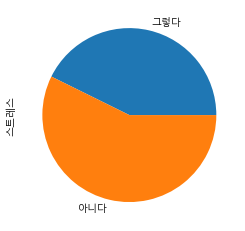

In [50]:
df['스트레스'].plot.pie()

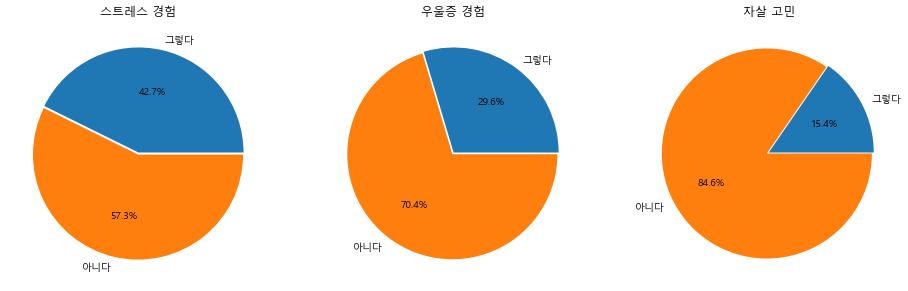

In [32]:
f, ax = plt.subplots(1,3, figsize=(16,8))

df['스트레스'].plot.pie(explode=[0,0.02], ax=ax[0], autopct='%1.1f%%')
ax[0].set_title('스트레스 경험')
ax[0].set_ylabel('')

df['우울감'].plot.pie(explode=[0,0.02], ax=ax[1], autopct='%1.1f%%')
ax[1].set_title('우울증 경험')
ax[1].set_ylabel('')

df['자살생각'].plot.pie(explode=[0,0.02], ax=ax[2], autopct='%1.1f%%')
ax[2].set_title('자살 고민')
ax[2].set_ylabel('')

plt.show()